<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/06.01-Empirical-Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical gain tuning

>N.B.: This notebook were inspired in [this](https://www.youtube.com/watch?v=uXnDwojRb1g) video.

## Summary

Let's try to empirical tune an ideal PID controller of a servo control loop with a plant modelled as a second order system. In order to make the things simpler, let's assume $G_a(s) = G_m(s) = 1$.

## Initializations

In [ ]:
import scipy as sp
import numpy as np
!pip install control
from control.matlab import *
import matplotlib.pyplot as plt

     |████████████████████████████████| 357 kB 5.5 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=07871743108bd7863b1ee23ad10ce9ca31932f02fcba62550978a1deb44e946f
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


## Simulation function

We wrapped the simulation and plot processes in the following function:

In [ ]:
def pidtest(Kp, Ki, Kd, 
            alpha = 0.02,
            K   = 1e-1,
            tau = 20,
            qsi = 0.5,
            tinf = 0):
  
  Gc = tf([Kd, Kp, Ki], [alpha*Kd/Kp, 1, 0])
  G  = tf(K, [tau**2, 2*qsi*tau, 1])
  Gcl = feedback(Gc*G, 1)
  t = np.arange(0, 10*tau, tau/10)
  if tinf > 0:
    t = np.arange(0, tinf, tau/10)
  ysp = np.ones(len(t))
  y = step(Gcl, t)[0]
  plt.plot(t, y, t, ysp)
  plt.xlabel('t')
  plt.ylabel('Deviation in $y$ or $y_{sp}$')
  plt.legend(['$y$', '$y_{sp}$'])

## Tuning process

Similiar to the inspirational video, let's first try a PID controller with only the P action and $K_p = -1$.

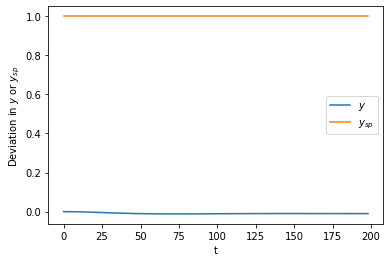

In [ ]:
pidtest(-1,0,0) # run 0

It's clear that the controller gain choosen has the wrong sign. 

It must have a positive sign instead of a negative one. Let's correct the sign and try again.

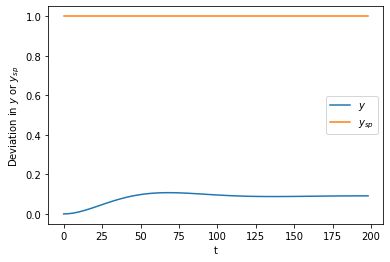

In [ ]:
pidtest(1,0,0) # run 1

The offset is to high! Let's increase the P action gain one order of magnitude and see what happens.

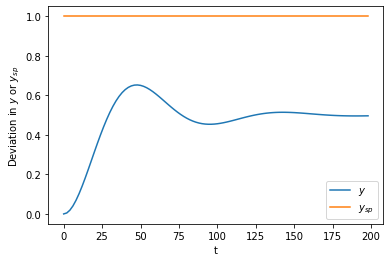

In [ ]:
pidtest(10,0,0) # run 2

The offset was reduced, but it is almost 50% yet. Let's increase the P action gain one order of magnitude again and see what happens.

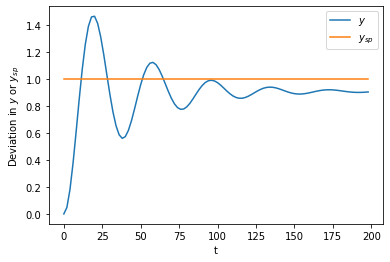

In [ ]:
pidtest(100,0,0) # run 3

The offset was reduced again (as the theory tells us) and now it is almost 10% only. 

Let's increase the P action gain one order of magnitude again and see what happens.

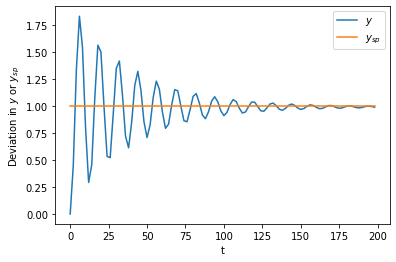

In [ ]:
pidtest(1000,0,0) # run 4

The offset is nearly 0%, but this reduction came with a lot of oscillation and an overshoot of more than 75%. 

Let's back to the earlier value of the P action and try to improve the performance by using the D action.

Now, let's do the same process with the D action gain starting with $K_d = 1$.

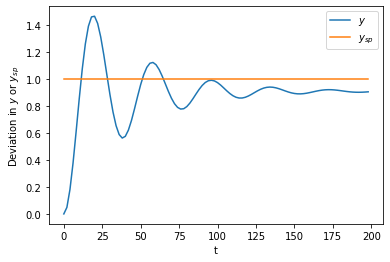

In [ ]:
pidtest(100,0,1) # run 5

We need more damping, let's try increase the D action gain one order of magnitude.

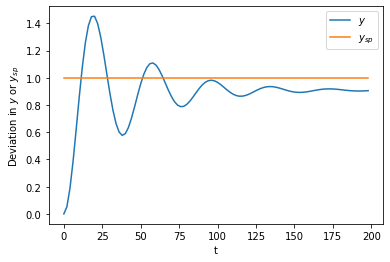

In [ ]:
pidtest(100,0,10) # run 6

More damping, please!

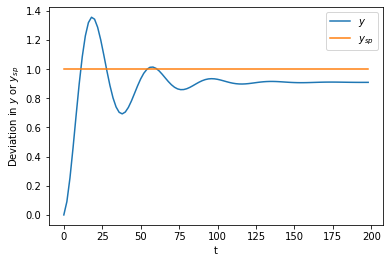

In [ ]:
pidtest(100,0,100) # run 7

More damping again, please!

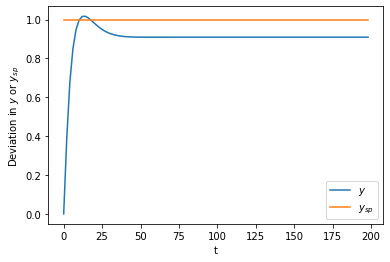

In [ ]:
pidtest(100,0,1000) # run 8

Just a bit more damping.

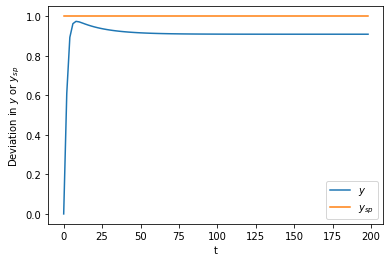

In [ ]:
pidtest(100,0,2000) # run 9

The theory also tell us that neither P action or D action alone or even combined are able to eliminate offset. 

So, we will need the I action in order to get rid of this offset.

Now, let's do the same process with the I action gain starting with $K_i = 1$.

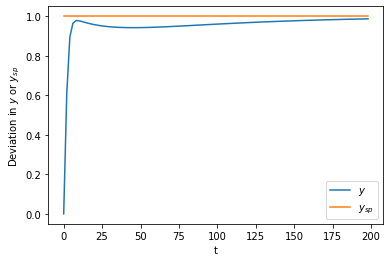

In [ ]:
pidtest(100,1,2000) # run 10

Not enough I action, let's increase it.

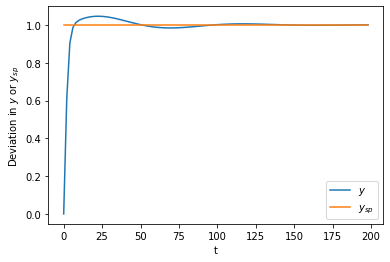

In [ ]:
pidtest(100,10,2000) # run 11

The offset was eliminated, but what will happen if we increase more the I action?

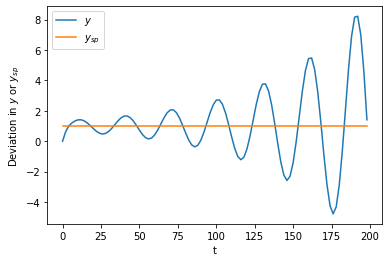

In [ ]:
pidtest(100,100,2000) # run 12

Ops! Something thing really bad happens, didn't it? 

The control loop becames unstable due too much I action. 

Let's move back to the earlier I action gain value, but reducing it by half in order to eliminate the small overshoot observed.

In another words, let's try $K_i = 5$.

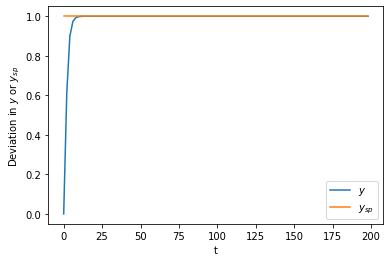

In [ ]:
pidtest(100,5,2000) # run 13

Wunderbar! We achieve a fast closed loop response with no overshoot!

The PID tuning settings from our empirical tuning process are $K_p = 100$, $K_i = 5$ and $K_d = 2000$.

Let's zooming the closed loop response to see in detail how fast it is.

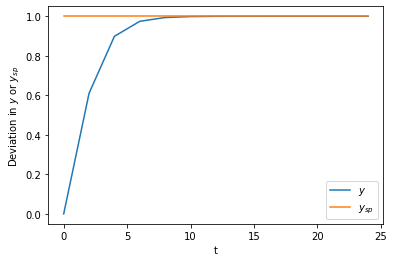

In [ ]:
pidtest(100,5,2000,tinf=25)